In [1]:
import bilby
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import argparse

import os.path



# Check finished PE runs

In [2]:
t12_inj_arr = [0, 0.001, 0.003, 0.01, 0.03]
phi_lens_inj_arr = [0.6]#[0, 0.6]
snr_inj_arr = [10,15,20,30,40]#[20,40]
seed_arr = [888888]
odir = 'GW190814_like_bfs_21082022'#'GW150914_like_bfs_12062022'#'GW150914_like_bfs_04042022'

In [3]:
label_nGR_arr = []
label_GR_arr = []


for t12 in t12_inj_arr : 
    for phi_lens in phi_lens_inj_arr:
        for snr in snr_inj_arr:
            for seed in seed_arr:
                label_nGR = 'nGR_rec_t12_'+str(t12)+'_phi_' +str(phi_lens) + '_snr_'+str(snr)+'_seed_'+str(seed)
                label_GR = 'GR_rec_t12_'+str(t12)+'_phi_' +str(phi_lens) + '_snr_'+str(snr)+'_seed_'+str(seed)
                label_GR_arr.append(label_GR)
                label_nGR_arr.append(label_nGR)

In [4]:
data_dir = '/home1/srashti.goyal/tgr-lensing/codes/outdir/'+odir+'/'

In [5]:
for file1,file2 in zip(label_nGR_arr,label_GR_arr):
    
    print(os.path.isfile(data_dir+file1+'_result.json'), file1)
    print(os.path.isfile(data_dir+file2+'_result.json'), file2)
    print('\n')

True nGR_rec_t12_0_phi_0.6_snr_10_seed_888888
True GR_rec_t12_0_phi_0.6_snr_10_seed_888888


True nGR_rec_t12_0_phi_0.6_snr_15_seed_888888
True GR_rec_t12_0_phi_0.6_snr_15_seed_888888


True nGR_rec_t12_0_phi_0.6_snr_20_seed_888888
True GR_rec_t12_0_phi_0.6_snr_20_seed_888888


True nGR_rec_t12_0_phi_0.6_snr_30_seed_888888
True GR_rec_t12_0_phi_0.6_snr_30_seed_888888


True nGR_rec_t12_0_phi_0.6_snr_40_seed_888888
True GR_rec_t12_0_phi_0.6_snr_40_seed_888888


True nGR_rec_t12_0.001_phi_0.6_snr_10_seed_888888
True GR_rec_t12_0.001_phi_0.6_snr_10_seed_888888


True nGR_rec_t12_0.001_phi_0.6_snr_15_seed_888888
True GR_rec_t12_0.001_phi_0.6_snr_15_seed_888888


True nGR_rec_t12_0.001_phi_0.6_snr_20_seed_888888
True GR_rec_t12_0.001_phi_0.6_snr_20_seed_888888


True nGR_rec_t12_0.001_phi_0.6_snr_30_seed_888888
True GR_rec_t12_0.001_phi_0.6_snr_30_seed_888888


True nGR_rec_t12_0.001_phi_0.6_snr_40_seed_888888
True GR_rec_t12_0.001_phi_0.6_snr_40_seed_888888


True nGR_rec_t12_0.003_phi_0.6

# Read posteriors and plot violins

In [68]:
t12_inj_arr = ['0', '0.001',  '0.01', '0.03']
#phi_inj_arr = ['0', '0.6', '0.6', '0.6', '0.6']
phi_inj_arr = ['0.6', '0.6', '0.6', '0.6']


snr =40


In [69]:
snr_df= pd.DataFrame()
snr_df['t12']=t12_inj_arr
snr_df['phi_lens']=phi_inj_arr
snr_df['seed'] = 888888
snr_df['snr'] = snr


In [70]:
snr_df['ngr_label']='nGR_rec_t12_'+snr_df['t12'].astype(str)+'_phi_' +snr_df['phi_lens'].astype(str) + '_snr_'+snr_df['snr'].astype(str)+'_seed_'+snr_df['seed'].astype(str)
snr_df['gr_label']='GR_rec_t12_'+snr_df['t12'].astype(str)+'_phi_' +snr_df['phi_lens'].astype(str) + '_snr_'+snr_df['snr'].astype(str)+'_seed_'+snr_df['seed'].astype(str)


snr_df.tail()

t12 phi_lens    seed  snr                                     ngr_label  \
0      0      0.6  888888   40      nGR_rec_t12_0_phi_0.6_snr_40_seed_888888   
1  0.001      0.6  888888   40  nGR_rec_t12_0.001_phi_0.6_snr_40_seed_888888   
2   0.01      0.6  888888   40   nGR_rec_t12_0.01_phi_0.6_snr_40_seed_888888   
3   0.03      0.6  888888   40   nGR_rec_t12_0.03_phi_0.6_snr_40_seed_888888   

                                      gr_label  
0      GR_rec_t12_0_phi_0.6_snr_40_seed_888888  
1  GR_rec_t12_0.001_phi_0.6_snr_40_seed_888888  
2   GR_rec_t12_0.01_phi_0.6_snr_40_seed_888888  
3   GR_rec_t12_0.03_phi_0.6_snr_40_seed_888888

In [71]:
df_res = snr_df.add_suffix('_snr'+str(snr))

#df_res = pd.merge(snr_20_df,snr_40_df,on=['t12','phi_lens'],suffixes=['_snr30','_snr15'])

In [72]:
odir='GW190814_like_bfs_21082022'#'GW150914_like_bfs_12062022'
#odir = 'GW150914_like_bfs_04042022'
data_dir = '/home1/srashti.goyal/tgr-lensing/codes/outdir/'+odir+'/'

In [73]:
snr=str(snr)#'30'#'40'
res_GR_arr=[]
res_nonGR_arr=[]

for event in df_res.index.values:
    print('Reading ..', event)
    json_file_GR=data_dir+df_res.loc[event]['gr_label_snr'+snr]+'_result.json'
    json_file_nonGR = data_dir+df_res.loc[event]['ngr_label_snr'+snr]+'_result.json'
    print(' reading GR posteriors')
    f=open(json_file_GR)
    #res_GR = bilby.result.read_in_result()
    res_GR = json.load(f)
    f.close()
    res_GR_arr.append(res_GR)
    df_res.loc[event,'Log evidence GR_snr'+snr] = res_GR['log_evidence']
    df_res.loc[event,'Log BF GR_snr'+snr] = res_GR['log_bayes_factor']


    print(' reading non-GR posteriors')
    #res_nonGR = bilby.result.read_in_result(json_file_nonGR)
    f=open(json_file_nonGR)
    #res_GR = bilby.result.read_in_result()
    res_nonGR = json.load(f)
    df_res.loc[event,'Log evidence nonGR_snr'+snr] = res_nonGR['log_evidence']
    df_res.loc[event,'Log BF nonGR_snr'+snr] = res_nonGR['log_bayes_factor']


    f.close()
    res_nonGR_arr.append(res_nonGR)

Reading .. 0
 reading GR posteriors
 reading non-GR posteriors
Reading .. 1
 reading GR posteriors
 reading non-GR posteriors
Reading .. 2
 reading GR posteriors
 reading non-GR posteriors
Reading .. 3
 reading GR posteriors
 reading non-GR posteriors


In [74]:
df_res['Log_BF_NGR_GR_snr'+snr] = df_res['Log evidence nonGR_snr'+snr] - df_res['Log evidence GR_snr'+snr]
df_res['Log_BF_NGR_GR_frombf_snr'+snr] = df_res['Log BF nonGR_snr'+snr] - df_res['Log BF GR_snr'+snr]


df_res

t12_snr40 phi_lens_snr40  seed_snr40  snr_snr40  \
0         0            0.6      888888         40   
1     0.001            0.6      888888         40   
2      0.01            0.6      888888         40   
3      0.03            0.6      888888         40   

                                ngr_label_snr40  \
0      nGR_rec_t12_0_phi_0.6_snr_40_seed_888888   
1  nGR_rec_t12_0.001_phi_0.6_snr_40_seed_888888   
2   nGR_rec_t12_0.01_phi_0.6_snr_40_seed_888888   
3   nGR_rec_t12_0.03_phi_0.6_snr_40_seed_888888   

                                gr_label_snr40  Log evidence GR_snr40  \
0      GR_rec_t12_0_phi_0.6_snr_40_seed_888888          -36549.520674   
1  GR_rec_t12_0.001_phi_0.6_snr_40_seed_888888          -36561.608103   
2   GR_rec_t12_0.01_phi_0.6_snr_40_seed_888888          -36743.802231   
3   GR_rec_t12_0.03_phi_0.6_snr_40_seed_888888          -36838.761523   

   Log BF GR_snr40  Log evidence nonGR_snr40  Log BF nonGR_snr40  \
0       734.387993             -36603.859973          680.048693   
1       738.127655             -36555.809026          743.926731   
2       559.002491             -36560.001153          742.803569   
3       443.640933             -36558.401246          724.001210   

   Log_BF_NGR_GR_snr40  Log_BF_NGR_GR_frombf_snr40  
0           -54.339299                  -54.339299  
1             5.799076                    5.799076  
2           183.801078                  183.801078  
3           280.360277                  280.360277

In [75]:
par1='t12'
par2='lens_angle'
samples_events=[]
for i,event in enumerate(df_res.index.values):
    res_nonGR = res_nonGR_arr[i]
    samples = pd.DataFrame(res_nonGR['posterior']['content'])[[par1,par2,'log_likelihood']]
    samples['t12_inj'] = df_res['t12_snr'+snr].values[i]
    samples_events.append(samples)

In [76]:
samples_events_df = pd.concat(samples_events)

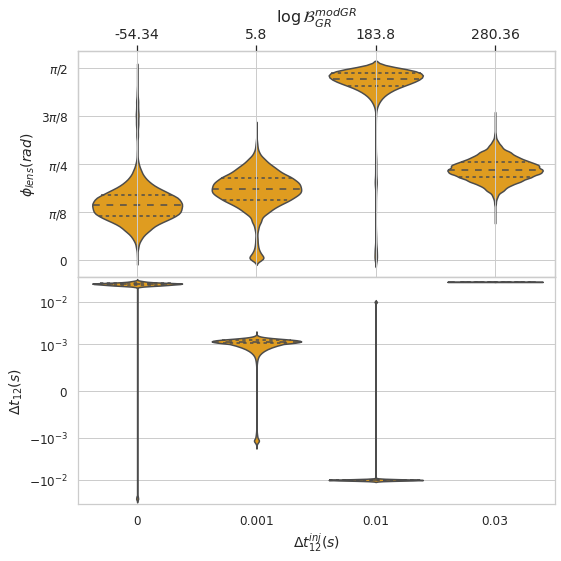

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), 
                         sharex=True, gridspec_kw=dict(height_ratios=(1, 1), hspace=0))
ticks = np.arange(4)#5

sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.violinplot(x='t12_inj',y=par1,data=samples_events_df,scale="count",inner="quartile",ax=axes[1],color="orange")
axes[1].set_ylabel('$\Delta t_{12}(s)$', fontsize=14)
axes[1].set_xticks(ticks)
axes[1].set_yscale('symlog',linthresh=0.001)
#axes[1].set_yticks(np.hstack([-(10**np.linspace(-1,-3,3)),0,10**np.linspace(-3,-1,3)]))



sns.violinplot(x='t12_inj',y=par2,data=samples_events_df,scale="count",inner="quartile",ax=axes[0],color="orange")
axes[0].set_ylabel('$\phi_{lens}(rad)$', fontsize=14)
axes[0].set_yticks(np.arange(0, np.pi/2+0.01, np.pi/8))
labels = ['$0$', r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$']
axes[0].set_yticklabels(labels)
    
axes[0].set_xticks(ticks)
#axes[0].set_xticklabels(paths_res['Log_BF_NGR_GR'], fontsize=14)
ax=axes[0].twiny()
ax.set_xlim(axes[0].get_xlim())
ax.set_xticks(ticks)
ax.set_xlabel('$\log \mathcal{B}^{modGR}_{GR}$',fontsize=16)
ax.set_xticklabels(np.round(df_res['Log_BF_NGR_GR_snr'+snr],2), fontsize=14)
axes[1].set_xlabel('$\Delta t_{12}^{inj}(s)$', fontsize=14)

fig.tight_layout()
plt.savefig(data_dir+odir+'_snr'+snr+'_violin_2d.pdf')
plt.show()

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


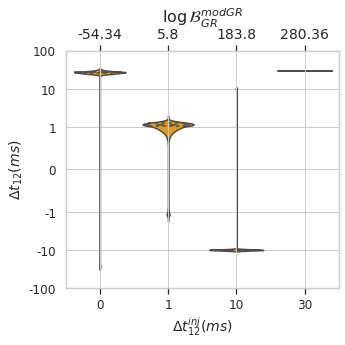

In [81]:
fig, axes = plt.subplots(figsize=(5, 5))
ticks = np.arange(4)#5
#samples_events_df['t12_inj_ms']=#samples_events_df['t12_inj']/1000
samples_events_df[par1 + '_ms']=samples_events_df[par1]*1000

sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.violinplot(x='t12_inj',y=par1+ '_ms',data=samples_events_df,scale="count",inner="quartile",color="orange")
axes.set_ylabel('$\Delta t_{12}(ms)$', fontsize=14)
axes.set_xticks(ticks)
axes.set_yscale('symlog',linthresh=1)
axes.set_xticklabels(['0','1','10','30'])#,'3'
axes.set_yticklabels(['-100','-10','-1','0','1','10','100'])
axes.set_ylim(-100,100)




#axes.set_xscale('symlog',linthresh=0.001)


#axes[1].set_yticks(np.hstack([-(10**np.linspace(-1,-3,3)),0,10**np.linspace(-3,-1,3)]))


#axes[0].set_xticklabels(paths_res['Log_BF_NGR_GR'], fontsize=14)
ax=axes.twiny()
ax.set_xlim(axes.get_xlim())
ax.set_xticks(ticks)
ax.set_xlabel('$\log \mathcal{B}^{modGR}_{GR}$',fontsize=16)
ax.set_xticklabels(np.round(df_res['Log_BF_NGR_GR_snr'+snr],2), fontsize=14)
axes.set_xlabel('$\Delta t_{12}^{inj}(ms)$', fontsize=14)

fig.tight_layout()
plt.savefig(data_dir+odir+'_snr'+snr+'_violin.pdf')
plt.show()

In [82]:
import matplotlib

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


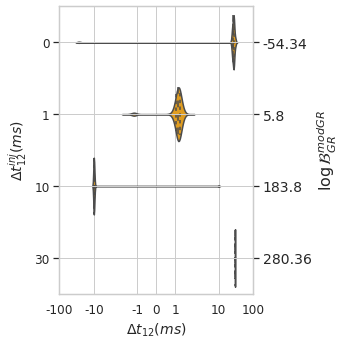

In [83]:
fig, axes = plt.subplots(figsize=(5, 5))
ticks = np.arange(4)#5

sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.violinplot(y='t12_inj',x=par1+'_ms',data=samples_events_df,scale="count",inner="quartile",color="orange")
axes.set_xlabel('$\Delta t_{12}(ms)$', fontsize=14)
axes.set_yticks(ticks)
axes.set_xscale('symlog')#,linthresh=1)
axes.set_yticklabels(['0','1','10','30'])#,'3'
axes.tick_params(axis='x', which='minor')
axes.set_xticklabels(['-100','-10','-1','0','1','10','100'])
axes.set_xlim(-100,100)
#locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 )) 
#axes.xaxis.set_minor_locator(locmin)
#axes.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#axes.grid(which='both')

#axes.set_xscale('symlog',linthresh=0.001)


#axes[1].set_yticks(np.hstack([-(10**np.linspace(-1,-3,3)),0,10**np.linspace(-3,-1,3)]))


#axes[0].set_xticklabels(paths_res['Log_BF_NGR_GR'], fontsize=14)
ax=axes.twinx()
#ax.set_xticklabels(['','','','',''])
ax.set_ylim(axes.get_ylim())
ax.set_yticks(ticks)
#ax.tick_params(axis ='y')

ax.set_ylabel('$\log \mathcal{B}^{modGR}_{GR}$',fontsize=16)
ax.set_yticklabels(np.round(df_res['Log_BF_NGR_GR_snr'+snr],2), fontsize=14)
axes.set_ylabel('$\Delta t_{12}^{inj}(ms)$', fontsize=14)

fig.tight_layout()
plt.savefig(data_dir+odir+'_snr'+snr+'_violin_t12_vertical.pdf')
plt.show()